# Identify key users
Identifying key users on social media is important to mitigate the effect of misinformation.
* Malicious users
* Bots
* Persuaders
* Trolls

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from utils import preprocess
# from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
# from gensim.models import Word2Vec

%matplotlib inline
sns.set(style="darkgrid")

# Load data

In [133]:
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
df['viral'] = [1 if (mis!=-1 or sh > 1) else 0 for mis, sh in zip(df['misinformation'], df['shares'])]

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [134]:
# users
df_users = pd.read_csv('data/2018/users.csv')

# credibility score with laplace smoothing
df_users['credibility'] = 1-df_users['misinformation']/(df_users['virals']+1)
df_users.head(5)

,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,24,0.005460,152,668192,90,2160,10,69,690.0,0.002275,0.416667,0.600000
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,227,0.097341,1640,498105,909,25437,58,707,5009.0,0.024871,0.255507,0.745614
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,243,0.117733,525,389426,303,25215,85,241,6812.0,0.041182,0.349794,0.651639
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,116,0.057426,738,644385,404,16856,25,285,2316.0,0.012376,0.215517,0.786325
4,170916900626840870,1,1810,828,0.457459,982,0.542541,111,0.061326,152,275120,90,9990,69,69,4761.0,0.038122,0.621622,0.383929


In [135]:
print('total users: ', len(df_users))

total users:  5364


# Distributions

In [136]:
def outlier_iqr(s):
    q3 = s.quantile(0.75)
    q1 = s.quantile(0.25)
    out = q3+1.5*(q3-q1)
    return out

def outlier(s):
    out = s.quantile(0.95)
    return out

### Number of messages

In [137]:
print('raw number of messages')

print(df_users['number_of_messages'].describe())

msg_outlier = outlier(df_users['number_of_messages'])
print('outliers: ', msg_outlier)

raw number of messages
count    5364.000000
mean       52.684750
std       138.060355
min         1.000000
25%         3.000000
50%        13.000000
75%        45.000000
max      4396.000000
Name: number_of_messages, dtype: float64
outliers:  232.84999999999945


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


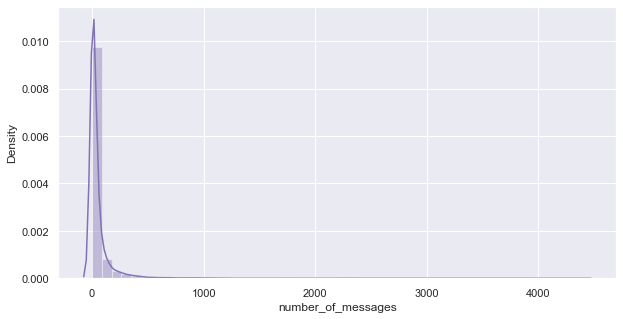

In [138]:
plt.figure(figsize=(10,5))
sns.distplot(df_users['number_of_messages'], kde = True, color = 'C4')
plt.show()

In [139]:
print('users with low activity')
df_users[df_users['number_of_messages'] < df_users['number_of_messages'].quantile(0.25)]

users with low activity


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
4286,8336488125908935379,1,2,2,1.0,0,0.0,0,0.0,88,176,41,0,0,34,0.0,0.0,0.0,1.0
4287,6875491021077833123,1,2,0,0.0,2,1.0,0,0.0,91,182,28,0,0,18,0.0,0.0,0.0,1.0
4288,-3336310125646763359,1,2,0,0.0,2,1.0,0,0.0,74,148,32,0,0,26,0.0,0.0,0.0,1.0
4289,-2527878442120488955,1,2,2,1.0,0,0.0,0,0.0,139,278,70,0,0,59,0.0,0.0,0.0,1.0
4290,-7122587308028551890,1,2,0,0.0,2,1.0,0,0.0,165,330,68,0,0,48,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5359,-3685511676029813622,1,1,0,0.0,1,1.0,0,0.0,165,165,68,0,0,48,0.0,0.0,0.0,1.0
5360,-3687281691650946329,1,1,0,0.0,1,1.0,0,0.0,187,187,97,0,0,78,0.0,0.0,0.0,1.0
5361,4870300454101875011,1,1,1,1.0,0,0.0,0,0.0,56,56,28,0,0,23,0.0,0.0,0.0,1.0
5362,7020988212245908273,1,1,1,1.0,0,0.0,0,0.0,90,90,42,0,0,30,0.0,0.0,0.0,1.0


In [140]:
print('users with high activity (95 percentile)')
df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.95)]

users with high activity (95 percentile)


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,24,0.005460,152,668192,90,2160,10,69,690.0,0.002275,0.416667,0.600000
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,227,0.097341,1640,498105,909,25437,58,707,5009.0,0.024871,0.255507,0.745614
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,243,0.117733,525,389426,303,25215,85,241,6812.0,0.041182,0.349794,0.651639
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,116,0.057426,738,644385,404,16856,25,285,2316.0,0.012376,0.215517,0.786325
4,170916900626840870,1,1810,828,0.457459,982,0.542541,111,0.061326,152,275120,90,9990,69,69,4761.0,0.038122,0.621622,0.383929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,5045562863966605913,1,235,155,0.659574,80,0.340426,25,0.106383,269,63215,145,3625,17,114,1938.0,0.072340,0.680000,0.346154
265,-612810256248025955,1,234,68,0.290598,166,0.709402,11,0.047009,272,63648,110,1210,6,73,438.0,0.025641,0.545455,0.500000
266,7376637358209551663,1,233,71,0.304721,162,0.695279,35,0.150215,96,22368,53,1855,22,46,1012.0,0.094421,0.628571,0.388889
267,4305486479648129759,5,233,171,0.733906,62,0.266094,97,0.416309,902,62149,480,12579,13,342,1152.0,0.055794,0.134021,0.867347


### Number of misinformation shared

In [141]:
print('analyse only active users')
df_active_users = df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.50)]

analyse only active users


In [142]:
print('raw number of misinformation')
print(df_active_users['misinformation'].describe())
mis_outlier = outlier(df_active_users['misinformation'])
print('outliers: ', mis_outlier)

raw number of misinformation
count    2633.000000
mean        4.136726
std        10.059828
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       147.000000
Name: misinformation, dtype: float64
outliers:  17.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


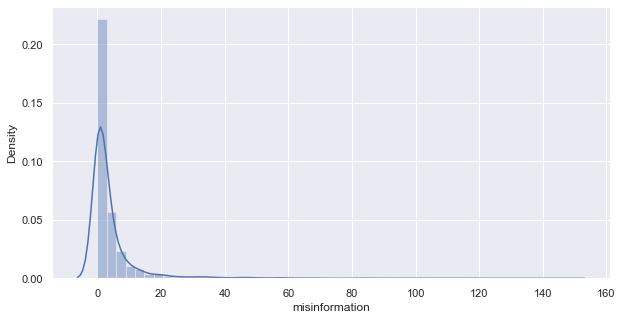

In [143]:
plt.figure(figsize=(10,5))
sns.distplot(df_active_users['misinformation'], kde = True)
plt.show()

In [144]:
print('samples of users with high misinformation number')
df_users[df_users['misinformation'] > mis_outlier]

samples of users with high misinformation number


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,227,0.097341,1640,498105,909,25437,58,707,5009.0,0.024871,0.255507,0.745614
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,243,0.117733,525,389426,303,25215,85,241,6812.0,0.041182,0.349794,0.651639
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,116,0.057426,738,644385,404,16856,25,285,2316.0,0.012376,0.215517,0.786325
4,170916900626840870,1,1810,828,0.457459,982,0.542541,111,0.061326,152,275120,90,9990,69,69,4761.0,0.038122,0.621622,0.383929
5,-6433788305811138375,1,1584,466,0.294192,1118,0.705808,193,0.121843,152,240768,90,17370,117,69,8073.0,0.073864,0.606218,0.396907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,-1838311250326952737,1,106,69,0.650943,37,0.349057,28,0.264151,152,16112,90,2520,21,69,1449.0,0.198113,0.750000,0.275862
680,-4001364801948757926,2,100,63,0.630000,37,0.370000,32,0.320000,89,5897,51,1132,18,37,488.0,0.180000,0.562500,0.454545
707,-5270685105381125196,1,97,45,0.463918,52,0.536082,32,0.329897,26,2522,15,480,27,13,351.0,0.278351,0.843750,0.181818
756,-1667746819294183344,4,89,41,0.460674,48,0.539326,34,0.382022,600,15259,346,3400,30,253,2147.0,0.337079,0.882353,0.142857


### Most of the volume of misinformation is spread by the same users?
We can call this users with high misinformation level malicious

In [145]:
def messages_by_key_users(user, key_users):
    if user in key_users:
        return True
    else:
        return False

In [146]:
df_malicious = df_users[df_users['misinformation'] > mis_outlier]
malicious = set(df_malicious['id'])

# misinformation
total_mis = len(df[df['misinformation']==1])
print('total misinformation: ',total_mis)
    
mask = []

for u in df['id']:
    mask.append(messages_by_key_users(u,malicious))  
    
df_superspreaders = df[mask]
df_superspreaders_messages = df_superspreaders[df_superspreaders['misinformation']==1]

print('total users:',len(df_users))
print('total malicious users: {a:1d} ({b:.1f}%)'.format(a = len(malicious), b = len(malicious)*100/len(df_users)))
print('proportion of misinformation sent by malicious users: {a:.1f}%'.format(a = len(df_superspreaders_messages)*100/total_mis))

total misinformation:  11412
total users: 5364
total malicious users: 129 (2.4%)
proportion of misinformation sent by malicious users: 42.8%


In [156]:
test = df[df['id']==-7649344784600108030]
test

,id,date,hour,timestamp,ddi,country,country_iso3,ddd,state,group,midia,url,characters,words,types,viral,shares,text,misinformation
231160,-7649344784600108030,06/09/18,12:05,2018-09-06 12:05:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231288,-7649344784600108030,08/09/18,08:41,2018-09-08 08:41:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231330,-7649344784600108030,08/09/18,15:51,2018-09-08 15:51:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231406,-7649344784600108030,09/09/18,09:39,2018-09-09 09:39:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231410,-7649344784600108030,09/09/18,11:18,2018-09-09 11:18:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231430,-7649344784600108030,09/09/18,15:32,2018-09-09 15:32:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231617,-7649344784600108030,11/09/18,08:53,2018-09-11 08:53:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231744,-7649344784600108030,12/09/18,21:27,2018-09-12 21:27:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231821,-7649344784600108030,13/09/18,15:59,2018-09-13 15:59:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231822,-7649344784600108030,13/09/18,16:01,2018-09-13 16:01:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1


In [157]:
test[test['viral']==1]

,id,date,hour,timestamp,ddi,country,country_iso3,ddd,state,group,midia,url,characters,words,types,viral,shares,text,misinformation
231160,-7649344784600108030,06/09/18,12:05,2018-09-06 12:05:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231288,-7649344784600108030,08/09/18,08:41,2018-09-08 08:41:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231330,-7649344784600108030,08/09/18,15:51,2018-09-08 15:51:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231406,-7649344784600108030,09/09/18,09:39,2018-09-09 09:39:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231410,-7649344784600108030,09/09/18,11:18,2018-09-09 11:18:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231430,-7649344784600108030,09/09/18,15:32,2018-09-09 15:32:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231617,-7649344784600108030,11/09/18,08:53,2018-09-11 08:53:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231744,-7649344784600108030,12/09/18,21:27,2018-09-12 21:27:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231821,-7649344784600108030,13/09/18,15:59,2018-09-13 15:59:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1
231822,-7649344784600108030,13/09/18,16:01,2018-09-13 16:01:00,55,BRASIL,BRA,63,Tocantins,2018_55,0,0,193,24,23,1,14,*📌PAGAMENTOS DE BOLETOS COM 50% DE DESCONTO📌*\...,1


In [158]:
virals = len(test[test['viral']==1])
virals

47

In [161]:
users_reached = len(set(df[df['group']=='2018_55']['id']))
users_reached

166